In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('/content/proyeksi-penduduk-2010-2035.csv')

In [36]:
le = LabelEncoder()
df['kelamin_encoded'] = le.fit_transform(df['kelamin'])  # L = 0, P = 1
df['propinsi_encoded'] = le.fit_transform(df['propinsi'])  # Encode propinsi


In [37]:
# Feature Engineering: Rasio jumlah per tahun
df['jumlah_per_tahun'] = df['jumlah'] / df['tahun']

In [38]:
# Pilih fitur dan target
X = df[['kode', 'tahun', 'jumlah', 'jumlah_per_tahun', 'propinsi_encoded']]
y = df['kelamin_encoded']

In [39]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train_scaled, y_train)

# Predict and Evaluate SVC model
y_pred_svc = svc_model.predict(X_test_scaled)
print("Support Vector Classifier (SVC) Classification Report")
print(classification_report(y_test, y_pred_svc))

Support Vector Classifier (SVC) Classification Report
              precision    recall  f1-score   support

           0       0.43      0.70      0.53        56
           1       0.41      0.19      0.26        63

    accuracy                           0.43       119
   macro avg       0.42      0.44      0.40       119
weighted avg       0.42      0.43      0.39       119



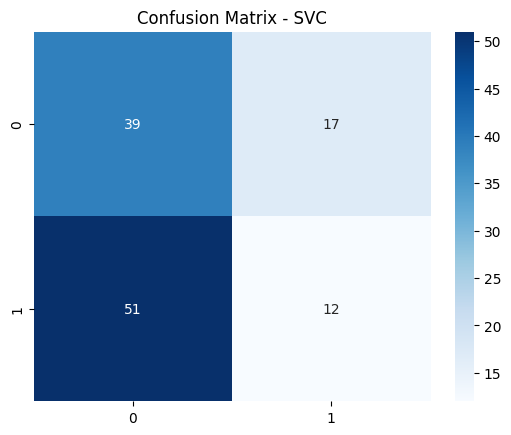

In [41]:
# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVC")
plt.show()

Random Forest Classifier Classification Report
              precision    recall  f1-score   support

           0       0.11      0.11      0.11        56
           1       0.19      0.19      0.19        63

    accuracy                           0.15       119
   macro avg       0.15      0.15      0.15       119
weighted avg       0.15      0.15      0.15       119



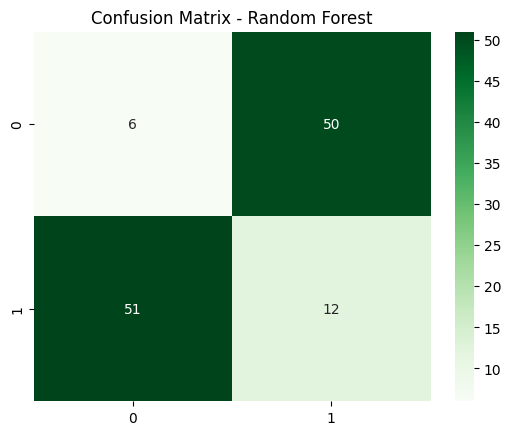

In [42]:
# ------------------------------
# Random Forest Classifier
# ------------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Classification Report")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()